In [1]:
!pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1b/0f/77716aa9dd84bb1aa5e93c87122af1de89697b6231f6d01d58d4e7c03c14/yfinance-0.2.36-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     -------------- ----------------------- 122.9/314.6 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 314.6/314.6 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --------- ------------------------------ 0.7/3.0 MB 15.5 MB/s eta 0:00:01
     --

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [10]:
stocks = input("Enter code ")
data = yf.download(stocks,"2010-01-01", "2024-01-01" )
data.head()


Enter code ^NSEI


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0


In [11]:
data.shape

(3434, 6)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3434 entries, 2010-01-04 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3434 non-null   float64
 1   High       3434 non-null   float64
 2   Low        3434 non-null   float64
 3   Close      3434 non-null   float64
 4   Adj Close  3434 non-null   float64
 5   Volume     3434 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 187.8 KB


In [13]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3.434000e+03
mean,10087.024754,10136.652461,10020.775572,10080.008538,10080.008538,2.308173e+05
std,4431.644957,4445.667086,4409.585910,4429.532530,4429.532530,2.106818e+05
min,4623.149902,4623.149902,4531.149902,4544.200195,4544.200195,0.000000e+00
25%,6025.737671,6056.062622,5981.587402,6013.524902,6013.524902,1.168000e+05
50%,8791.500000,8821.750000,8730.525391,8775.275391,8775.275391,1.928500e+05
75%,11934.837891,11977.975098,11861.275391,11920.425049,11920.425049,2.955000e+05
max,21737.650391,21801.449219,21678.000000,21778.699219,21778.699219,1.811000e+06


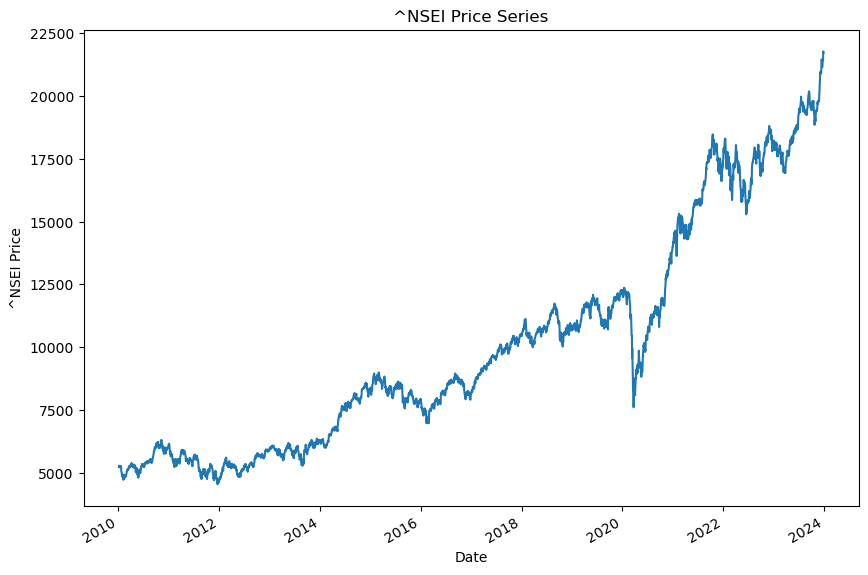

In [18]:
data.Close.plot(figsize=(10,7))
plt.ylabel("{} Price".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

C:\Users\Dhruv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


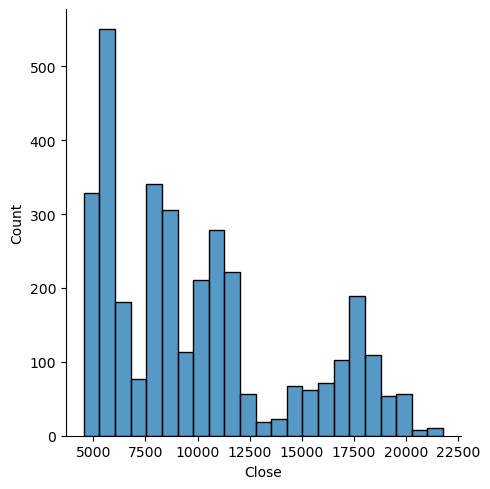

In [20]:
sns.displot(data["Close"])


C:\Users\Dhruv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


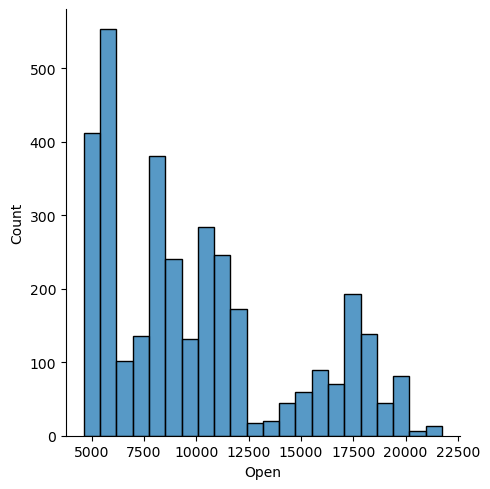

In [21]:
sns.displot(data["Open"])

C:\Users\Dhruv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


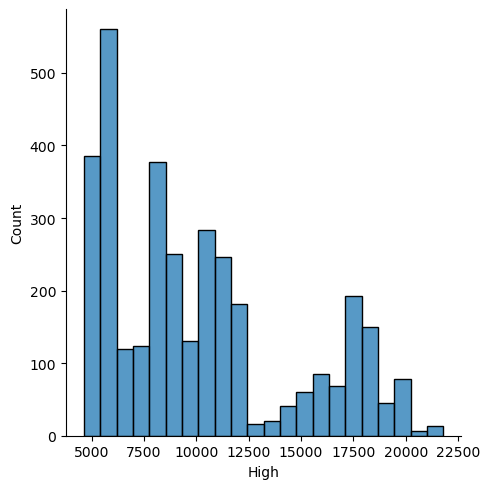

In [22]:
sns.displot(data["High"])

In [23]:
#Conclusion 

#-shape of data
#-how our data is distributed
#-very very non linear
#- Linear, logis, regularised, SVM,

In [26]:
x = data.drop("Close", axis = 1)
y = data["Close"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2747, 5)
(687, 5)
(2747,)
(687,)


In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
pred1 = lr.predict(x_test)

In [30]:
pred1

array([ 6103.45019531, 14359.45019531,  4856.39990234,  8266.45019531,
        5325.85009766, 19564.5       ,  5862.70019531,  7979.10009766,
        5635.89990234,  7936.04980469, 11017.        ,  5359.35009766,
       17222.        ,  5669.60009766, 17622.25      , 10513.84960938,
        9491.25      , 10444.20019531,  5414.75      ,  8246.84960938,
       15576.20019531,  4651.60009766,  5526.14990234,  8331.95019531,
       10880.09960938, 10716.54980469, 11312.20019531,  8945.79980469,
        5971.04980469,  8191.5       ,  6291.10009766,  8170.04980469,
        5222.64990234,  6160.95019531,  7781.89990234,  7801.04980469,
       11910.15039063, 14590.34960938, 10614.34960938,  5302.54980469,
        5320.60009766, 18634.55078125,  4934.75      ,  5320.39990234,
        8551.09960937,  5380.5       , 10452.5       ,  5133.39990234,
        5693.04980469,  7934.89990234, 18338.55078125, 15737.75      ,
        7914.75      , 10741.09960937, 10249.25      ,  6139.04980469,
      

In [36]:
#MSE -> MEAN SQUARE ERROR
#RMSE ---> SQRT(MSE)
#R2_SQUARE ---> 1.0 #GOOD MODEL


from sklearn.metrics import mean_squared_error, r2_score

#ytest is ground truth ypred is predicted value




def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test, y_pred)
    print(mse)
    print(rmse)
    print(r2_scors)
    
calculate_metrics(y_test, pred1)    
    

2.0467602958935833e-23
4.524113499784884e-12
1.0


In [42]:
from sklearn.linear_model import Lasso , Ridge

la = Lasso().fit (x_train, y_train)
ri = Ridge().fit(x_train, y_train)

lap = la.predict(x_test)
rip = ri.predict(y_test)



C:\Users\Dhruv\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.969e+06, tolerance: 5.258e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dhruv\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 6103.45019531 14359.45019531  4856.39990234  8266.45019531
  5325.85009766 19564.5         5862.70019531  7979.10009766
  5635.89990234  7936.04980469 11017.          5359.35009766
 17222.          5669.60009766 17622.25       10513.84960938
  9491.25       10444.20019531  5414.75        8246.84960938
 15576.20019531  4651.60009766  5526.14990234  8331.95019531
 10880.09960938 10716.54980469 11312.20019531  8945.79980469
  5971.04980469  8191.5         6291.10009766  8170.04980469
  5222.64990234  6160.95019531  7781.89990234  7801.04980469
 11910.15039062 14590.34960938 10614.34960938  5302.54980469
  5320.60009766 18634.55078125  4934.75        5320.39990234
  8551.09960938  5380.5        10452.5         5133.39990234
  5693.04980469  7934.89990234 18338.55078125 15737.75
  7914.75       10741.09960938 10249.25        6139.04980469
  8538.29980469 11322.5         8627.40039062  4845.35009766
 15080.75        7850.45019531  8530.79980469 10891.59960938
  8421.79980469 19711.44921875  8532.84960938  5390.20019531
  8762.09960938 10782.90039062 20096.59960938 10817.
 15721.5         5269.04980469  4705.79980469 10729.84960938
  6177.35009766  8281.09960938 18114.90039062  6796.39990234
 19528.80078125 18244.19921875  5906.14990234 12355.5
  8044.14990234 19434.55078125 11214.04980469  5205.10009766
  5686.25       10210.84960938 14507.29980469 15582.79980469
 18696.09960938  9674.54980469  7424.64990234  8778.40039062
 20192.34960938  5326.60009766  5916.39990234 10802.70019531
 10792.5        20070.         21456.65039062 15691.40039062
  5364.95019531 17648.94921875 11162.25        4936.85009766
 11861.09960938  5189.          7861.04980469  6162.25
 19396.44921875 16130.75       17392.69921875 16682.65039062
 18068.55078125  4947.60009766  6066.04980469  7714.89990234
 18601.5         5228.45019531 11582.90039062 10530.
  8833.59960938  5431.          7459.60009766 10760.59960938
 11552.5         5257.95019531 17185.69921875 17624.05078125
 11416.95019531  5660.25        5531.5         5459.85009766
  6101.85009766  7783.35009766  5522.39990234 18129.94921875
 10604.34960938  5306.29980469  5231.89990234 10930.45019531
  4999.95019531  9270.90039062  6363.89990234  8270.45019531
 10118.25        6018.29980469  8831.54980469 16945.05078125
 17076.90039062  6178.35009766  5745.95019531 10141.15039062
  5386.45019531  5719.70019531 10570.54980469 10847.90039062
  5476.5         4613.10009766  8362.65039062  6079.79980469
 16931.05078125 11222.40039062 17857.25       17604.94921875
 15746.45019531  8171.20019531  7454.14990234  9668.25
  5833.75       10888.79980469  8659.90039062 20926.34960938
 19517.          8491.         11520.29980469  8065.79980469
  4831.25       10855.15039062  5881.         19389.
 14789.95019531 19674.25        8185.79980469  5274.85009766
 14521.15039062 11131.79980469  4942.79980469 17503.34960938
  5999.04980469 15746.5        17522.44921875 11438.09960938
  5505.35009766  5531.          5799.75        7486.14990234
 12214.54980469  8793.54980469 12120.29980469 11870.65039062
 19347.44921875  8518.54980469  5421.         11023.20019531
  4914.         11724.09960938  8910.5         6601.39990234
  6338.95019531  8337.90039062  7435.10009766  8170.79980469
 16953.94921875  4778.35009766 12362.29980469 12215.90039062
 10576.84960938 16522.75        8615.25        8153.60009766
  4742.79980469  5850.20019531 17359.75       15732.09960938
  7750.89990234  5818.60009766 17759.30078125  6091.85009766
  7786.10009766  9030.45019531 14761.54980469  7887.79980469
  8769.15039062 15670.25        5932.95019531 10618.20019531
  4706.45019531  5550.35009766 10548.70019531  8952.34960938
  5988.70019531  7018.70019531  9106.25       15824.45019531
  5896.79980469 16259.29980469  8236.04980469 18512.75
  5879.85009766 11118.          6115.35009766  5244.75
  5522.29980469 17245.65039062  5007.89990234 18181.75
 10858.70019531  8467.90039062  6135.85009766  5072.95019531
  6203.35009766 12858.40039062 15722.20019531 18534.40039062
  7880.70019531 18856.84960938  8769.04980469  7733.45019531
 15774.40039062 10153.09960938 20103.09960938  5338.
 14281.20019531 17123.59960938  5884.95019531  4763.25
 18771.25       17171.94921875 17748.59960938  5687.25
 10463.20019531  7747.         14199.5         7612.5
  5153.25       10397.45019531  6272.75       11126.40039062
 10682.20019531  8017.54980469  5289.70019531  5718.70019531
  5253.54980469 11377.75        5554.25        5641.60009766
 17745.90039062  6030.79980469 18157.          5317.89990234
  5439.25       19778.30078125 15799.09960938 11168.04980469
 12113.45019531  6221.14990234 10380.45019531  5921.39990234
  9984.79980469 17222.75        5413.85009766  8629.15039062
 10844.65039062 10066.40039062  8477.29980469 17858.19921875
  5711.60009766 15966.65039062 10322.25       10705.75
  5072.85009766 17558.90039062 18127.34960938 11049.65039062
 11408.40039062  8102.04980469 17624.40039062  6144.89990234
  5239.14990234 10551.70019531  6164.35009766 10430.34960938
  7834.45019531  8567.95019531 18642.75       18122.5
 10077.09960938  6159.45019531  4839.60009766  5290.85009766
  8060.70019531  7968.85009766  9261.95019531  6187.29980469
 17894.84960938  5574.04980469  7649.25        8754.95019531
  9955.20019531  5885.70019531 11300.45019531  6779.39990234
  5766.5         9119.40039062 11301.79980469 10061.54980469
  5401.45019531 10607.34960938  5684.25        7748.70019531
  5479.14990234  6233.89990234 11278.90039062  5235.89990234
  5685.39990234  4921.39990234  8632.75       16245.34960938
  9574.95019531  8740.95019531  5727.85009766  4873.89990234
 10316.45019531  9217.95019531 17287.05078125  8677.90039062
  8189.70019531  6120.29980469 10656.20019531  5034.
  9765.54980469 17203.94921875  5359.54980469  7842.75
 10265.65039062 12088.54980469  5373.70019531 17490.69921875
  8495.15039062 15109.29980469  6022.39990234 17891.94921875
  4772.14990234  8179.5        15245.59960938  5244.89990234
  5900.5         7904.75        8152.95019531  8108.45019531
 19523.55078125 10016.95019531  6201.85009766  5447.5
 13258.54980469 19381.65039062  8407.20019531 19727.05078125
 11355.75        5660.64990234 17416.55078125 10226.54980469
  5576.95019531  5928.39990234 15799.34960938 19597.30078125
 18297.         11429.5         9912.84960938  5592.
  5648.          9972.90039062  9979.70019531  4693.14990234
  9445.40039062  5088.10009766 10477.90039062  5262.45019531
 10912.25       16214.70019531  6694.35009766 11319.54980469
 10093.04980469 12771.70019531 10727.34960938 10628.5
 12048.20019531  5471.79980469  5114.14990234 11053.
 12125.90039062  6281.79980469  5571.54980469 16983.55078125
  8203.70019531 11244.70019531  5494.39990234 11691.95019531
 12174.65039062 11300.54980469  5740.75       15683.34960938
  5287.45019531  9100.79980469 18035.84960938  6074.64990234
 17532.05078125  4944.14990234  5277.89990234  7276.79980469
  9663.90039062 10640.95019531  5132.29980469 10741.09960938
 10234.65039062  8381.09960938 19733.55078125  7235.64990234
  6048.25        5486.14990234  5590.25        9136.84960938
  5229.         18118.30078125  9126.84960938  5449.10009766
  9311.95019531  5480.25        6694.79980469 11641.79980469
  7860.75        6145.79980469  8879.09960938 17711.44921875
  7351.         17576.84960938 11472.25        5368.14990234
 13133.90039062  5889.75        5068.5        11341.70019531
  8542.95019531  5990.5         6299.14990234 14634.15039062
 13932.59960938  7493.20019531  5184.25       19306.05078125
 19901.40039062  6318.89990234  8922.65039062  9316.84960938
 19133.25       11713.20019531  8040.20019531  8660.29980469
 18269.          5701.29980469 17764.80078125 17764.59960938
  5215.70019531  4867.25       11346.20019531 20901.15039062
 11895.45019531  5257.04980469 15632.09960938  6980.95019531
 17368.25        8597.75        9084.79980469  8338.29980469
 10326.90039062  7717.         17833.34960938  9187.29980469
  7222.29980469  5333.25       18633.84960938  8647.75
  4858.25        8475.75       19689.84960938  6091.45019531
 17822.94921875 17274.30078125 10167.45019531 17206.65039062
  6328.64990234  8564.59960938  7634.70019531  7493.35009766
  7791.29980469  4718.64990234 12089.15039062  7741.
  7663.89990234 11512.40039062 17117.59960938 14919.09960938
  5676.04980469  6121.60009766  7329.64990234  9380.90039062
  5190.60009766 11604.09960938 19632.55078125 16125.15039062
  9261.84960938  7946.35009766 11840.45019531  5742.
 10908.70019531  8756.75        8529.45019531  5708.04980469
 18816.69921875  8699.95019531 17475.65039062  5542.25
  5276.85009766  7812.         16955.44921875  5567.04980469
  5363.45019531 17605.84960938  9616.40039062 18348.
  5054.10009766  5199.79980469 17790.34960938 19465.
  8706.40039062  5825.          8462.34960938  8253.79980469
  8459.65039062  5012.54980469 16013.45019531 21349.40039062
  5847.70019531  8570.90039062 17807.65039062  5281.79980469
 11250.54980469  5230.10009766 16584.30078125  5483.29980469
  6009.04980469  8111.75       10442.20019531 12045.79980469
  6524.04980469 10685.59960938 14867.34960938 12719.95019531
 10922.75       11707.90039062 16842.80078125  5418.29980469
 16167.09960938  5842.          6048.5         5665.60009766
  8756.54980469  8337.         18857.25       10242.65039062
  4985.64990234 17176.69921875  4965.70019531  8638.5
 11962.09960938 11829.40039062  8786.20019531  7437.79980469
  8723.29980469  8738.09960938  7215.70019531 17754.40039062
  5315.04980469 11101.65039062  9604.90039062  7123.14990234
  5385.20019531 15208.90039062 19384.30078125  8744.34960938
 18069.          9859.90039062  7721.29980469 10637.
 18418.75       21418.65039062 18826.          7536.79980469
 10057.40039062 18307.65039062  5220.45019531  6152.75
  8592.15039062 16793.90039062  5746.95019531 10876.75
  9504.09960938 10192.95019531 17339.84960938  5252.20019531
  8102.10009766 17576.30078125  5651.35009766  5316.95019531
 19365.25        5203.64990234 18082.84960938  4855.75
 17094.34960938 10786.95019531  7701.70019531  8659.09960938
  9606.90039062 10623.59960938 17353.5        10146.79980469
  7870.14990234  9520.90039062  5654.54980469  5833.20019531
  7911.85009766  5348.95019531 11787.15039062].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [46]:
calculate_metrics(y_test, lap)

5002.015068949816
70.72492537252914
0.9997673050914029


In [51]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C':[0.1, 1, 100, 1000],
              'gamma':[1,0.1,0.01, 0.001, 0.0001],
              'kernel' : ['rbf']
             
             }
grid = GridSearchCV(svr, param_grid, refit= True, verbose = 3)
grid.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.033 total time=   0.8s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.108 total time=   0.9s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.076 total time=   1.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.109 total time=   0.8s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.107 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.033 total time=   1.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.108 total time=   0.9s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.076 total time=   0.9s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.109 total time=   1.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.107 total time=   1.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.033 total time=   0.9s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [55]:
svr = SVR(C=10, gamma = 0.01, kernel = 'rbf')
svr.fit(x_train, y_train)
svr_pred= svr.predict(x_test)

In [57]:
import joblib

joblib.dump(ri, 'model.pkl')
ridge_from_joblib = model = joblib.load("model.pkl")
